**My Final rank out of 178 Participants**

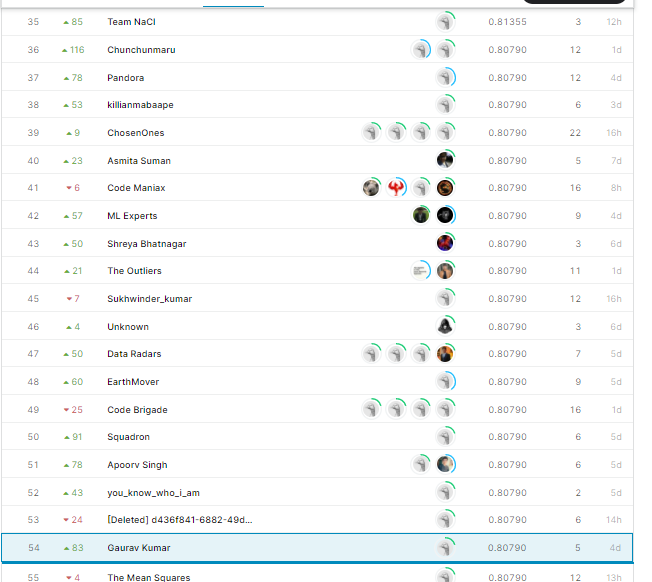

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# to ignore warnings
import warnings as wg
wg.filterwarnings("ignore")

In [3]:
pd.set_option('max_rows', None)

### Loading the reproducible data

In [4]:
data = pd.read_csv('train.csv')

In [5]:
x = data.drop('CustomerAttrition', axis = 'columns')
y = data['CustomerAttrition']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [8]:
# Dropping ID column
X_train = X_train.drop('ID', axis = 'columns')

**Imputing Values in GrandPayment Column**

In [9]:
# Imputing the missing 'GrandPayment' with -1
# If I fill them with 0 then it may mean that their bill is pending 
X_train['GrandPayment'] = X_train['GrandPayment'].fillna(-1)

**Replacing all negative values of ServiceSpan with 0**

In [10]:
X_train['ServiceSpan'] = X_train['ServiceSpan'].replace([-2, -1], 0)

In [11]:
X_train.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
769,Female,Yes,No,No,55,Yes,Wifi Broadband,No,No,No,No,Electronic,89.804996,4931.437050
1456,Male,Yes,Yes,No,58,Yes,Wifi Broadband,No,Yes,No,No,Electronic,98.339137,5867.204745
6326,Male,No,No,No,51,Yes,Wifi Broadband,Yes,Yes,Yes,No,Check,99.021300,5425.362193
2257,Female,No,No,No,41,Yes,Wifi Broadband,No,Yes,No,No,Bank,93.703441,3756.520276
5962,Male,No,No,No,0,Yes,Wifi Broadband,No,No,No,No,Check,45.824503,46.005585


### Label Encoding

In [12]:
X_train.columns

Index(['sex', 'Aged', 'Married', 'TotalDependents', 'ServiceSpan',
       'MobileService', '4GService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription', 'SettlementProcess',
       'QuarterlyPayment', 'GrandPayment'],
      dtype='object')

In [13]:
lst = ['Aged', 'Married', 'TotalDependents', 'MobileService', 'CyberProtection', 'HardwareSupport',
       'TechnicalAssistance', 'FilmSubscription']

In [14]:
X_train[lst] = X_train[lst].replace(['Yes', 'No'], [1, 0])

In [15]:
X_train.head()

,sex,Aged,Married,TotalDependents,ServiceSpan,MobileService,4GService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,SettlementProcess,QuarterlyPayment,GrandPayment
769,Female,1,0,0,55,1,Wifi Broadband,0,0,0,0,Electronic,89.804996,4931.437050
1456,Male,1,1,0,58,1,Wifi Broadband,0,1,0,0,Electronic,98.339137,5867.204745
6326,Male,0,0,0,51,1,Wifi Broadband,1,1,1,0,Check,99.021300,5425.362193
2257,Female,0,0,0,41,1,Wifi Broadband,0,1,0,0,Bank,93.703441,3756.520276
5962,Male,0,0,0,0,1,Wifi Broadband,0,0,0,0,Check,45.824503,46.005585


### One Hot Encoding

In [16]:
X_train_Encod = pd.get_dummies(X_train, drop_first=True)
X_train_Encod.head()

,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
769,1,0,0,55,1,0,0,0,0,89.804996,4931.437050,0,0,1,0,0,1
1456,1,1,0,58,1,0,1,0,0,98.339137,5867.204745,1,0,1,0,0,1
6326,0,0,0,51,1,1,1,1,0,99.021300,5425.362193,1,0,1,0,1,0
2257,0,0,0,41,1,0,1,0,0,93.703441,3756.520276,0,0,1,0,0,0
5962,0,0,0,0,1,0,0,0,0,45.824503,46.005585,1,0,1,0,1,0


### Feature Scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
for i in X_train_Encod.columns:
    scaler.fit(X_train_Encod[[i]])
    X_train_Encod[[i]] = scaler.transform(X_train_Encod[[i]])

In [19]:
X_train_Encod.head()

,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
769,1.0,0.0,0.0,0.753425,1.0,0.0,0.0,0.0,0.0,0.707162,0.567805,0.0,0.0,1.0,0.0,0.0,1.0
1456,1.0,1.0,0.0,0.794521,1.0,0.0,1.0,0.0,0.0,0.789494,0.675527,1.0,0.0,1.0,0.0,0.0,1.0
6326,0.0,0.0,0.0,0.698630,1.0,1.0,1.0,1.0,0.0,0.796075,0.624664,1.0,0.0,1.0,0.0,1.0,0.0
2257,0.0,0.0,0.0,0.561644,1.0,0.0,1.0,0.0,0.0,0.744771,0.432553,0.0,0.0,1.0,0.0,0.0,0.0
5962,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.282865,0.005411,1.0,0.0,1.0,0.0,1.0,0.0


## Preprocessing on Test Set

In [20]:
# Dropping ID column
X_test = X_test.drop('ID', axis = 'columns')

# Imputing the missing 'GrandPayment' with -1
X_test['GrandPayment'] = X_test['GrandPayment'].fillna(-1)

# Replace negative values with 0
X_test['ServiceSpan'] = X_test['ServiceSpan'].replace([-2, -1], 0)


In [21]:
# Label Encoding
X_test[lst] = X_test[lst].replace(['Yes', 'No'], [1, 0])

In [22]:
# One hot encoding
X_test_Encod = pd.get_dummies(X_test, drop_first=True)

In [23]:
for i in X_test_Encod.columns:
    scaler.fit(X_test_Encod[[i]])
    X_test_Encod[[i]] = scaler.transform(X_test_Encod[[i]])

In [24]:
X_test_Encod.head()

,Aged,Married,TotalDependents,ServiceSpan,MobileService,CyberProtection,HardwareSupport,TechnicalAssistance,FilmSubscription,QuarterlyPayment,GrandPayment,sex_Male,4GService_Satellite Broadband,4GService_Wifi Broadband,SettlementProcess_Card,SettlementProcess_Check,SettlementProcess_Electronic
5035,0.0,1.0,1.0,0.424658,1.0,0.0,0.0,0.0,1.0,0.059237,0.095363,1.0,0.0,1.0,1.0,0.0,0.0
5398,0.0,0.0,0.0,0.109589,1.0,0.0,0.0,0.0,1.0,0.748264,0.079744,1.0,0.0,1.0,0.0,0.0,1.0
1663,0.0,0.0,0.0,0.136986,1.0,1.0,0.0,0.0,0.0,0.554492,0.094077,0.0,0.0,0.0,0.0,0.0,1.0
2076,1.0,1.0,0.0,0.904110,1.0,0.0,0.0,1.0,1.0,0.854182,0.832062,0.0,0.0,1.0,0.0,0.0,0.0
4474,0.0,1.0,0.0,0.780822,1.0,1.0,1.0,1.0,1.0,0.663831,0.585361,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
Y_train.value_counts()

No     3726
Yes    1344
Name: CustomerAttrition, dtype: int64

Oversampling is required here

## Making ML Model

In [26]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.metrics import classification_report

In [35]:
svc = SVC()
lr = LogisticRegression()
rfc = RandomForestClassifier()

In [36]:
from sklearn.model_selection import cross_val_score

#### Cross Validation on Logistic

In [37]:
acc = cross_val_score(lr, X_train_Encod, Y_train)
acc

array([0.78303748, 0.77712032, 0.79881657, 0.79585799, 0.80078895])

In [38]:
np.mean(acc)

0.7911242603550296

In [39]:
lr.fit(X_train_Encod, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr.score(X_test_Encod, Y_test)

0.7831230283911672

In [41]:
print(classification_report(Y_test,lr.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.83      0.89      0.86       932
         Yes       0.61      0.49      0.55       336

    accuracy                           0.78      1268
   macro avg       0.72      0.69      0.70      1268
weighted avg       0.77      0.78      0.77      1268



#### Cross Validation on SVC

In [42]:
acc = cross_val_score(svc, X_train_Encod, Y_train)
acc

array([0.7800789 , 0.78205128, 0.78994083, 0.77712032, 0.79684418])

In [43]:
np.mean(acc)

0.785207100591716

In [44]:
svc.fit(X_train_Encod, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
svc.score(X_test_Encod, Y_test)

0.7839116719242902

In [46]:
print(classification_report(Y_test,svc.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.81      0.92      0.86       932
         Yes       0.64      0.41      0.50       336

    accuracy                           0.78      1268
   macro avg       0.73      0.66      0.68      1268
weighted avg       0.77      0.78      0.77      1268



#### Cross Validation on RandomForestClassifier

In [47]:
acc = cross_val_score(rfc, X_train_Encod, Y_train)
acc

array([0.77810651, 0.78303748, 0.78796844, 0.78698225, 0.78500986])

In [48]:
np.mean(acc)

0.7842209072978304

In [49]:
rfc.fit(X_train_Encod, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
print(classification_report(Y_test,rfc.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86       932
         Yes       0.62      0.47      0.54       336

    accuracy                           0.78      1268
   macro avg       0.72      0.68      0.70      1268
weighted avg       0.77      0.78      0.77      1268



#### Over Sampling

In [51]:
## RandomOverSampler to handle imbalanced data

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

In [52]:
os =  RandomOverSampler(ratio=1)

In [53]:
X_train_res, y_train_res = os.fit_sample(X_train_Encod, Y_train)

In [54]:
X_train_res.shape,y_train_res.shape

((7452, 17), (7452,))

In [55]:
print('Original dataset shape {}'.format(Counter(Y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({'No': 3726, 'Yes': 1344})
Resampled dataset shape Counter({'No': 3726, 'Yes': 3726})


Checking the model accuracy again

In [57]:
acc = cross_val_score(rfc, X_train_res, y_train_res)
acc

array([0.87525151, 0.89000671, 0.91610738, 0.90939597, 0.92550336])

In [58]:
np.mean(acc)

0.9032529854743674

In [59]:
acc = cross_val_score(svc, X_train_res, y_train_res)
acc

array([0.76190476, 0.76995305, 0.7852349 , 0.76845638, 0.8033557 ])

In [60]:
np.mean(acc)

0.7777809586827452

In [61]:
acc = cross_val_score(lr, X_train_res, y_train_res)
acc

array([0.74647887, 0.7665996 , 0.77919463, 0.7590604 , 0.78053691])

In [62]:
np.mean(acc)

0.766374083426735

### Checking the accuracy now

In [63]:
rfc.fit(X_train_res, y_train_res)
lr.fit(X_train_res, y_train_res)
svc.fit(X_train_res, y_train_res)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
print(classification_report(Y_test,rfc.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.84      0.84      0.84       932
         Yes       0.56      0.57      0.56       336

    accuracy                           0.77      1268
   macro avg       0.70      0.70      0.70      1268
weighted avg       0.77      0.77      0.77      1268



In [65]:
print(classification_report(Y_test,lr.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.89      0.74      0.80       932
         Yes       0.50      0.74      0.60       336

    accuracy                           0.74      1268
   macro avg       0.69      0.74      0.70      1268
weighted avg       0.78      0.74      0.75      1268



In [66]:
print(classification_report(Y_test,svc.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.88      0.73      0.80       932
         Yes       0.49      0.74      0.59       336

    accuracy                           0.73      1268
   macro avg       0.69      0.73      0.69      1268
weighted avg       0.78      0.73      0.74      1268



## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
  #          'C': [1,5,10]
            'penalty' : ['l1', 'l2'],
            'C' : np.logspace(-4, 4, 20),
        }
    }
}

In [132]:
scores = []

for model_name, mp in model_params.items():
    clf =  RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False,n_iter=3)
    clf.fit(X_train_res, y_train_res)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.770131,"{'kernel': 'rbf', 'C': 20}"
1,random_forest,0.899228,"{'n_estimators': 600, 'min_samples_split': 5, ..."
2,logistic_regression,0.765703,"{'penalty': 'l2', 'C': 29.763514416313132}"


In [133]:
list(df[df['model'] == 'random_forest']['best_params'])

[{'bootstrap': False,
  'max_depth': 80,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 600}]

these are the best parameters for RandomForestClassifier

[{'bootstrap': False,
  'max_depth': 80,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1400}]
  
giving accuracy of 91.8 on training



In [74]:
rfc_1 = RandomForestClassifier(bootstrap= False, max_depth= 80, max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 1400)

In [75]:
rfc_1.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
print(classification_report(Y_test,rfc_1.predict(X_test_Encod)))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85       932
         Yes       0.60      0.46      0.52       336

    accuracy                           0.78      1268
   macro avg       0.71      0.67      0.69      1268
weighted avg       0.76      0.78      0.77      1268



In [77]:
rfc_1.score(X_test_Encod, Y_test)

0.7752365930599369

#### Xgboost

In [78]:
import xgboost

In [79]:
classifier=xgboost.XGBClassifier()

In [80]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [81]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [82]:
random_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.1s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [83]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [84]:
xg_classifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [85]:
acc = cross_val_score(xg_classifier, X_train_res, y_train_res)
acc

array([0.82629108, 0.82897384, 0.8738255 , 0.84765101, 0.87852349])

In [86]:
np.mean(acc)

0.8510529845741113

In [88]:
xg_classifier.fit(X_train_res, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [92]:
np.array(X_test_Encod.head())

array([[0.        , 1.        , 1.        , 0.42465753, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.05923702,
        0.09536268, 1.        , 0.        , 1.        , 1.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.10958904, 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.74826408,
        0.07974442, 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.        , 0.        , 0.1369863 , 1.        ,
        1.        , 0.        , 0.        , 0.        , 0.55449211,
        0.09407705, 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ],
       [1.        , 1.        , 0.        , 0.90410959, 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.8541824 ,
        0.83206191, 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.780821

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [99]:
xg_classifier.predict(np.array(X_test_Encod))

array(['No', 'Yes', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [101]:
score_list = cross_val_score(xg_classifier,X_train_res,y_train_res,cv=10)
score_list

array([0.8002681 , 0.84048257, 0.84026846, 0.83758389, 0.87919463,
       0.88187919, 0.85637584, 0.86174497, 0.87248322, 0.88724832])

In [102]:
np.mean(score_list)

0.855752919373122

In [104]:
y_train_res

array(['No', 'No', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [106]:
xg_classifier.score(np.array(X_test_Encod), np.array(Y_test))

0.7555205047318612

In [122]:
test_new = pd.read_csv('test.csv')
print(test_new.shape)
test_new1 = test_new.copy()
print(test_new1.shape)
test_new1 = test_new1.drop('ID', axis = 'columns')
print(test_new1.shape)
test_new1['GrandPayment'] = test_new1['GrandPayment'].fillna(-1)
test_new1['ServiceSpan'] = test_new1['ServiceSpan'].replace([-2, -1], 0)
test_new1[lst] = test_new1[lst].replace(['Yes', 'No'], [1, 0])
print(test_new1.shape)
test_new1 = pd.get_dummies(test_new1, drop_first=True)
print(test_new1.shape)
for i in test_new1.columns:
    scaler.fit(test_new1[[i]])
    test_new1[[i]] = scaler.transform(test_new1[[i]])

(705, 15)
(705, 15)
(705, 14)
(705, 14)
(705, 17)


In [123]:
test_new1.shape

(705, 17)

In [124]:
predictions = xg_classifier.predict(np.array(test_new1))
predictions

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',

My accuracy was 0.78409

In [129]:
predictions = rfc_1.predict(np.array(test_new1))
predictions

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'No', 'Y

My accuracy was 0.80303 with this model

In [130]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_new.index # its important for comparison. Here "test_new" is your new test dataset
res = pd.concat([test_new[['ID']], res], axis = 'columns')
res.columns = ['ID',"CustomerAttrition"]
res.reset_index(drop=True, inplace=True)
res.head()

,ID,CustomerAttrition
0,WMORTPCG3HTIPEFSGUFY,No
1,GBLPEA16C3KGBO57KEFO,No
2,IDCQS0CO5P29AMKY3LO1,No
3,1IY29SDITYU6IFZ4KJB0,No
4,T5XMW5B0YPCONH30WJD2,No


In [131]:
# To download the csv file locally
from google.colab import files
res.to_csv('prediction2_RFC.csv')         
files.download('prediction2_RFC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>